In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
## data summary
iris = load_iris ()
t=dir(iris)
print("The structure of iris data:\n")
print(t)
print("data dimension: ", iris.data.shape, "\nfeature name\n",
iris.feature_names)
print("data label:\n", iris.target)
print("Check the location of this dataset\n")
print(iris.filename)

The structure of iris data:

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
data dimension:  (150, 4) 
feature name
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data label:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Check the location of this dataset

/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv


In [2]:
whole_iris_data=np.c_[iris.data, iris.target]
whole_iris_variables=iris.feature_names + ['target']
iris_data=pd.DataFrame(data=whole_iris_data,
columns=whole_iris_variables)
iris_data.head()
## make sure the label (target) is an integer type
iris_data['target']=iris_data['target'].astype('int64')
print(iris['target'])
print(iris_data.head())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]


In [3]:
filename='iris_data.csv'
iris_data.to_csv(filename)
import os
if os.path.isfile(filename):
    print(filename + " is saved!\n")
else:
    print(filename + " does not exist\n")

iris_data.csv is saved!



In [4]:
iris_binary = iris_data[(iris_data['target']==0)|(iris_data['target']==1)]
print("\n", iris_binary.head(), "\n\n***The iris binary data dimension: ",iris_binary.shape)
X_binary = iris_binary.iloc[:, :2]
y = iris_binary["target"]
training_data = X_binary
training_data_label = y


    sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns] 

***The iris binary data dimension:  (100, 5)


In [5]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(training_data, training_data_label)

rbf_svc = svm.SVC(kernel='rbf', gamma='scale')
rbf_svc.fit(training_data, training_data_label)

poly_svc = svm.SVC(kernel='poly', degree=3)
poly_svc.fit(training_data, training_data_label)

sig_svc = svm.SVC(kernel='sigmoid')
sig_svc.fit(training_data, training_data_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
h = .01
x_min, x_max = X_binary.iloc[:, 0].min() - 1, X_binary.iloc[:, 0].max() + 1
y_min, y_max = X_binary.iloc[:, 1].min() - 1, X_binary.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [0]:
test_data = np.c_[xx.ravel(), yy.ravel()]

 This is the test data label under SVC Linear Kernel
[1 1 1 ... 1 1 1]
The first 5x5 entries of the reshaped 2D test data label

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
 This is the test data label under SVC Sigmoid Kernel
[1 1 1 ... 0 0 0]
The first 5x5 entries of the reshaped 2D test data label

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
 This is the test data label under SVC RBF Kernel
[0 0 0 ... 0 0 0]
The first 5x5 entries of the reshaped 2D test data label

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
 This is the test data label under SVC Polynomial (degree 3) Kernel
[0 0 0 ... 1 1 1]
The first 5x5 entries of the reshaped 2D test data label

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


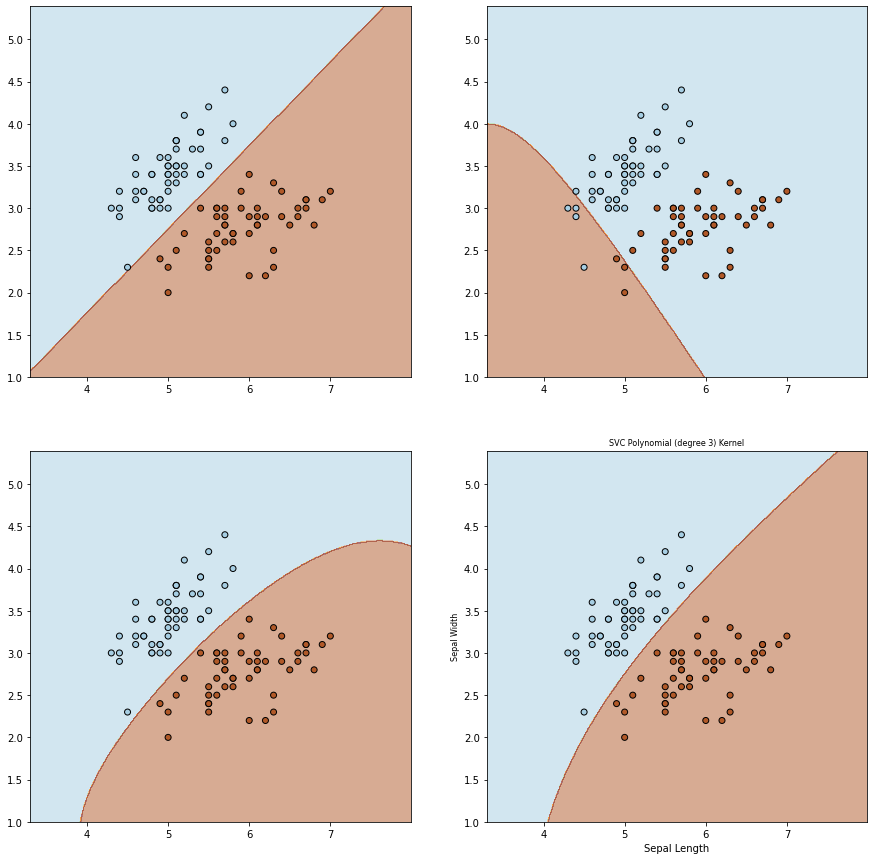

In [8]:
## visualization
plt.figure(figsize=(15, 15))
# title for the plots
titles = ['SVC Linear Kernel','SVC Sigmoid Kernel','SVC RBF Kernel','SVC Polynomial (degree 3) Kernel']
import time
svc_list=[linear_svc,sig_svc,rbf_svc,poly_svc]
kernels=['linear', 'sigmoid', 'rbf', 'poly']
sv_list={}# support vector list

for i, clf in enumerate(svc_list):
    plt.subplot(2, 2,i+1)
    test_data_label = clf.predict(test_data)
    sv_list[kernels[i]]=clf.support_vectors_
    
    print(" This is the test data label under " + titles[i])
    print(test_data_label)
    
    time.sleep(2)
    test_data_label = test_data_label.reshape(xx.shape)
    
    print("The first 5x5 entries of the reshaped 2D test data label\n")
    print(test_data_label[0:5, 0:5])
    plt.contourf(xx, yy, test_data_label, cmap=plt.get_cmap('Paired'), alpha=0.5)
    plt.scatter(training_data.iloc[:, 0],training_data.iloc[:, 1],c=y, cmap=plt.get_cmap('Paired'),edgecolors='black')
if i >=2:
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width', fontsize=8)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titles[i], fontsize=8)
    plt.show()

In [9]:
for i in range(len(kernels)):
  print("\nunder " + kernels[i] + " total support vector number: " + str(len(sv_list[kernels[i]])) + "\n")
  time.sleep(1)
  print(sv_list[kernels[i]])
  time.sleep(1)


under linear total support vector number: 16

[[4.9 3. ]
 [5.7 3.8]
 [5.4 3.4]
 [5.  3. ]
 [5.4 3.4]
 [5.5 3.5]
 [4.5 2.3]
 [4.8 3. ]
 [4.9 2.4]
 [5.2 2.7]
 [5.6 3. ]
 [5.9 3.2]
 [5.4 3. ]
 [6.  3.4]
 [5.6 3. ]
 [5.1 2.5]]

under sigmoid total support vector number: 100

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 

In [0]:
training_data, test_data, training_data_label, test_data_label = train_test_split(data, label,test_size=0.20, random_state=42)

In [0]:
# 2. Compute classification measures
import math
def compute_measure(predicted_label, true_label):
# output list ans = [accuracy, sensitivity, specificity, PPR, NPR, f1]
  t_idx = (predicted_label == true_label) # truely predicted
  f_idx = np.logical_not(t_idx) # falsely predicted
  p_idx = (true_label > 0) # positive targets
  n_idx = np.logical_not(p_idx) # negative targets
  tp = np.sum(np.logical_and(t_idx, p_idx)) # TP
  tn = np.sum(np.logical_and(t_idx, n_idx)) # TN
# false positive: original negative but classified as positive
# false negative: original positive but classified as negative
  fp = np.sum(np.logical_and(f_idx, n_idx))
  fn = np.sum(np.logical_and(f_idx, p_idx))
  tp_fp_tn_fn_list = []
  tp_fp_tn_fn_list.append(tp)
  tp_fp_tn_fn_list.append(fp)
  tp_fp_tn_fn_list.append(tn)
  tp_fp_tn_fn_list.append(fn)
  tp_fp_tn_fn_list = np.array(tp_fp_tn_fn_list)
  tp = tp_fp_tn_fn_list[0]
  fp = tp_fp_tn_fn_list[1]
  tn = tp_fp_tn_fn_list[2]
  fn = tp_fp_tn_fn_list[3]
  with np.errstate(divide='ignore'):
    sen = (1.0*tp)/(tp+fn)
  with np.errstate(divide='ignore'):
    spc = (1.0*tn)/(tn+fp)
  with np.errstate(divide='ignore'):
    ppr = (1.0*tp)/(tp+fp)
  with np.errstate(divide='ignore'):
    npr = (1.0*tn)/(tn+fn)
  with np.errstate(divide='ignore'):
    f1 = (2 * tp) / (2 * tp + fp + fn)
  acc = (tp+tn)*1.0/(tp+fp+tn+fn)
  d_idx = np.log2(1+acc) + np.log2(1+ (sen+spc)/2)
  ans = []
  ans.append(acc)
  ans.append(sen)
  ans.append(spc)
  ans.append(ppr)
  ans.append(npr)
  ans.append(f1)
  ans.append(d_idx)
  return ans

In [0]:
from sklearn.model_selection import train_test_split
## total data a label
data = iris_binary.iloc[:, :4]
label = iris_binary["target"]
## train and test split
training_data, test_data, training_data_label, test_data_label =train_test_split(data, label, test_size=0.30, random_state=28)

In [16]:
## build a svm object sequence
models = (svm.SVC(kernel='linear'),
svm.SVC(kernel='sigmoid'),
svm.SVC(kernel='rbf', gamma='scale'),
svm.SVC(kernel='poly', degree=3))
print('output classification list : [accuracy, sensitivity, specificity, PPR, NPR, F1, d_index]')
## checking learning performance
classification_measure_={}
for clf in models:
  clf.fit(training_data, training_data_label)
  predict_test_data_label = clf.predict(test_data)
  measure = compute_measure(predict_test_data_label, test_data_label)
  classification_measure_[clf.kernel]=measure
  print(clf.kernel)
  print(measure)

output classification list : [accuracy, sensitivity, specificity, PPR, NPR, F1, d_index]
linear
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0]
sigmoid
[0.4666666666666667, 1.0, 0.0, 0.4666666666666667, nan, 0.6363636363636364, 1.1375035237499351]
rbf
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0]
poly
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


In [0]:
def compute_accuracy(predicted_label,true_label):
  t_idx=(predicted_label,true_label) 
  t=np.sum(t_idx)  
  n=true_label.shape[0]  
  acc=t/n  
  return acc


In [0]:
data=iris_data.iloc[:,0:iris_data.shape[1]-1]
label=iris_data['target']
training_data,test_data,training_data_label,test_data_label=train_test_split(data,label,test_size=0.3,random_state=28)

In [24]:
for clf in models:
  clf.fit(training_data, training_data_label)
  predict_test_data_label = clf.predict(test_data)
  print(len(predict_test_data_label))
  acc = compute_accuracy(predict_test_data_label, test_data_label)
  print("SVM kernel:", clf.kernel)
  print('Accuracy:{:12.6f}'.format(acc))

45
SVM kernel: linear
Accuracy:    2.133333
45
SVM kernel: sigmoid
Accuracy:    1.044444
45
SVM kernel: rbf
Accuracy:    2.133333
45
SVM kernel: poly
Accuracy:    2.133333
